In [5]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import pandas as pd

df_wvs = pd.read_csv('../data/raw/wvs_ts_w1_w7.csv')


# Exploration WVS

In [2]:
df_wvs

,version,doi,S001,S002VS,S003,COUNTRY_ALPHA,COW_NUM,COW_ALPHA,S004,S006,...,Y023A,Y023B,Y023C,Y024A,Y024B,Y024C,survself,tradrat5,TradAgg,SurvSAgg
0,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,1,...,0.000000,0.444444,0.444444,0.33,0.0,0.165,-1.011276,0.160847,0.158964,-1.792410
1,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,2,...,0.111111,0.444444,0.444444,0.33,0.0,0.165,-0.688773,0.409283,0.558946,-1.208679
2,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,3,...,0.000000,0.444444,0.444444,0.33,0.5,0.415,NaN,NaN,NaN,NaN
3,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,4,...,0.000000,0.333333,0.333333,0.33,0.0,0.165,-1.319863,0.733956,1.081669,-2.350952
4,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,5,...,0.000000,0.333333,0.333333,0.00,0.5,0.250,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443483,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,716,ZWE,552,ZIM,-4,716071211,...,0.000000,0.000000,0.000000,0.66,0.5,0.580,-0.738923,-0.774148,-1.346378,-1.299450
443484,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,716,ZWE,552,ZIM,-4,716071212,...,0.000000,0.000000,0.777778,1.00,0.0,0.500,-0.445039,0.282275,0.354463,-0.767520
443485,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,716,ZWE,552,ZIM,-4,716071213,...,0.000000,0.000000,0.000000,0.33,0.0,0.165,-0.925464,-0.436454,-0.802691,-1.637090
443486,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,716,ZWE,552,ZIM,-4,716071214,...,0.000000,0.000000,0.000000,0.00,0.0,0.000,-2.398929,1.218936,1.862486,-4.304062


In [3]:
total_unique_countries = df_wvs["COUNTRY_ALPHA"].nunique()
print("Total unique countries:", total_unique_countries)

Total unique countries: 108


In [7]:
min_year = df_wvs["S020"].min()
max_year = df_wvs["S020"].max()

print("Min year:", min_year)
print("Max year:", max_year)

Min year: 1999
Max year: 2023


In [6]:
## Droping waves 1 to 3 (1981-1998)
df_wvs = df_wvs[df_wvs["S020"] > 1998]

## Exploring demographics

### Age

/var/folders/vk/c6csf7ws6pj9wy406twfjkfw0000gn/T/ipykernel_28178/927226246.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wvs["X003R"] = df_wvs["X003R"].replace(value_labels)


<Figure size 1200x800 with 0 Axes>

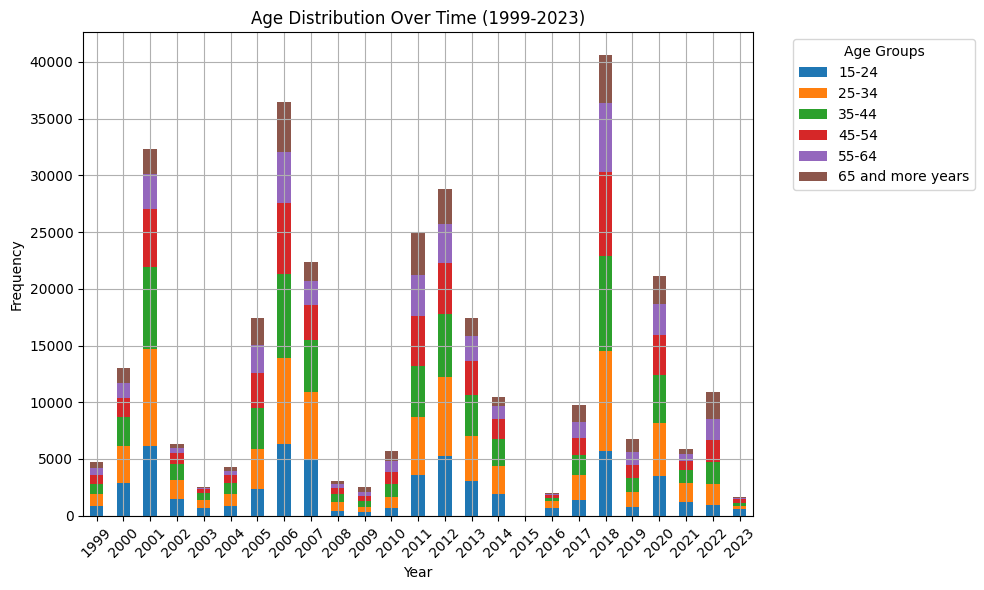

In [10]:
import matplotlib.pyplot as plt
# Relabeling of intervals
value_labels = {
    1: "15-24",
    2: "25-34",
    3: "35-44",
    4: "45-54",
    5: "55-64",
    6: "65 and more years",
    -1: "Don't know",
    -2: "No answer",
    -4: "Not asked",
    -5: "Other missing; Multiple answers Mail (EVS)"
}

# Replace the values with the labels
df_wvs["X003R"] = df_wvs["X003R"].replace(value_labels)

# Drop missing values for X003R (including labels -1, -2, -4, -5)
df_wvs_clean = df_wvs[~df_wvs["X003R"].isin(["Don't know", "No answer", "Not asked", "Other missing; Multiple answers Mail (EVS)"])]

# Ensure that all years from 1989 to 2023 are included, even if some years have no data
years_range = list(range(1999, 2024))

# Group by year (S020) and age interval (X003R) and calculate the counts
age_distribution_by_year = df_wvs_clean.groupby(['S020', 'X003R']).size().unstack(fill_value=0)

# Reindex to ensure all years from 1989 to 2023 are included, filling missing years with 0 counts
age_distribution_by_year = age_distribution_by_year.reindex(years_range, fill_value=0)

# Plot the distribution of age intervals over time (1989-2023)
plt.figure(figsize=(12, 8))
age_distribution_by_year.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title("Age Distribution Over Time (1999-2023)")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title="Age Groups", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # To adjust layout so labels don't get cut off

# Show the plot
plt.show()

/var/folders/vk/c6csf7ws6pj9wy406twfjkfw0000gn/T/ipykernel_28178/1309155264.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wvs["X003R"] = df_wvs["X003R"].replace(value_labels)
/var/folders/vk/c6csf7ws6pj9wy406twfjkfw0000gn/T/ipykernel_28178/1309155264.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wvs_clean['Year_Group'] = pd.cut(df_wvs_clean['S020'], bins=year_bins, labels=year_labels, right=True)
/var/folders/vk/c6csf7ws6pj9wy406twfjkfw0000gn/T/ipykernel_28178/1309155264.py:32: FutureWar

<Figure size 1200x800 with 0 Axes>

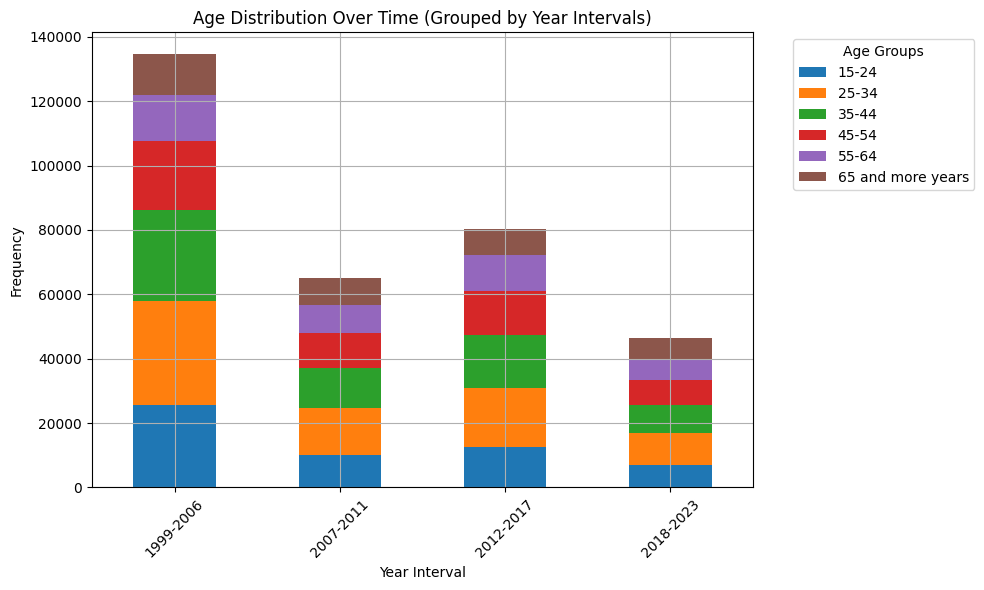

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Relabeling of intervals
value_labels = {
    1: "15-24",
    2: "25-34",
    3: "35-44",
    4: "45-54",
    5: "55-64",
    6: "65 and more years",
    -1: "Don't know",
    -2: "No answer",
    -4: "Not asked",
    -5: "Other missing; Multiple answers Mail (EVS)"
}

# Replace the values with the labels
df_wvs["X003R"] = df_wvs["X003R"].replace(value_labels)

# Drop missing values for X003R (including labels -1, -2, -4, -5)
df_wvs_clean = df_wvs[~df_wvs["X003R"].isin(["Don't know", "No answer", "Not asked", "Other missing; Multiple answers Mail (EVS)"])]

# Define the year intervals you want (e.g., 1999-2005, 2006-2010, etc.)
year_bins = [1999, 2007, 2012, 2018, 2023]  # Add an additional bin edge for 2023
year_labels = ["1999-2006", "2007-2011", "2012-2017", "2018-2023"]  # Labels match the number of bins - 1

# Group years into bins
df_wvs_clean['Year_Group'] = pd.cut(df_wvs_clean['S020'], bins=year_bins, labels=year_labels, right=True)

# Group by year range and age interval (X003R) and calculate the counts
age_distribution_by_year_group = df_wvs_clean.groupby(['Year_Group', 'X003R']).size().unstack(fill_value=0)

# Plot the distribution of age intervals over time (1999-2023) by grouped years
plt.figure(figsize=(12, 8))
age_distribution_by_year_group.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title("Age Distribution Over Time (Grouped by Year Intervals)")
plt.xlabel("Year Interval")
plt.ylabel("Frequency")

# Adding legend and grid
plt.legend(title="Age Groups", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # To adjust layout so labels don't get cut off

# Show the plot
plt.show()


### Rural vs. Urban

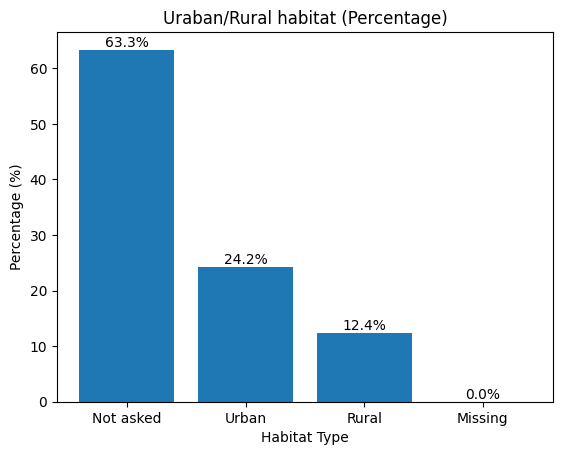

In [15]:
from matplotlib import pyplot as plt

# Define value mappings
value_labels = {
    1: "Urban",
    2: "Rural",
    -1: "Don't know",
    -2: "No answer",
    -4: "Not asked",
    -5: "Missing"
}

# Replace values only for plotting
counts = df_wvs["X050C"].replace(value_labels).value_counts(normalize=True) * 100

# Histogram (incl. percentages)
plt.bar(counts.index, counts.values)  
plt.title("Uraban/Rural habitat (Percentage)")
plt.xlabel("Habitat Type")
plt.ylabel("Percentage (%)")

# Show percentages on top of bars
for index, value in enumerate(counts.values):
    plt.text(counts.index[index], value, f'{value:.1f}%', ha='center', va='bottom')

plt.show()

## Worries: Government wire-tapping or reading my mail or email

/var/folders/vk/c6csf7ws6pj9wy406twfjkfw0000gn/T/ipykernel_28178/2815706994.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wvs["H006_06"] = df_wvs["H006_06"].replace(h006_06_labels)


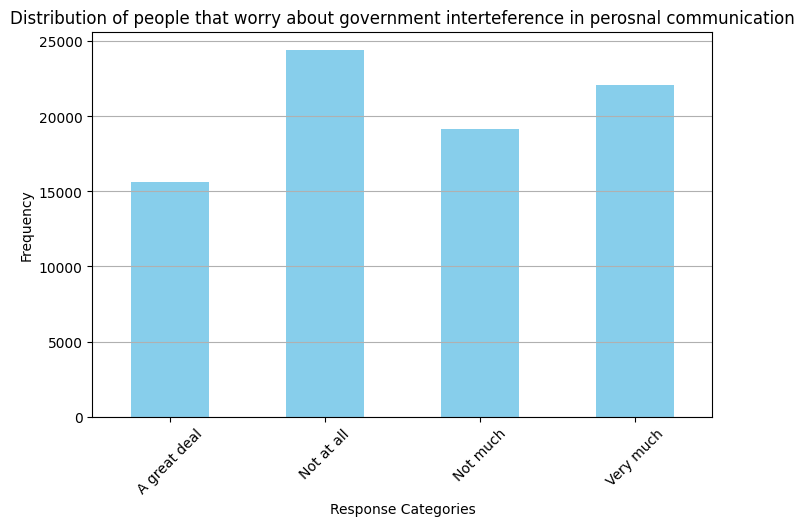

In [16]:
# Define the labels for H006_06
h006_06_labels = {
    1: "Very much",
    2: "A great deal",
    3: "Not much",
    4: "Not at all",
    -1: "Don't know",
    -2: "No answer",
    -4: "Not asked",
    -5: "Missing; Unknown"
}

# Replace numerical values with labels
df_wvs["H006_06"] = df_wvs["H006_06"].replace(h006_06_labels)

# Drop missing values for visualization (optional)
valid_responses = ["Very much", "A great deal", "Not much", "Not at all"]
df_wvs_filtered = df_wvs[df_wvs["H006_06"].isin(valid_responses)]

# Count occurrences of each category
h006_06_counts = df_wvs_filtered["H006_06"].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
h006_06_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution of people that worry about government interteference in perosnal communication")
plt.xlabel("Response Categories")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

In [17]:
# Group by country and response category, then count occurrences
h006_06_by_country = df_wvs.groupby(["COUNTRY_ALPHA", "H006_06"]).size().unstack()

# Display the first few rows to inspect the data
print(h006_06_by_country.head())

# Normalize to show percentages instead of raw counts (optional)
h006_06_by_country_pct = h006_06_by_country.div(h006_06_by_country.sum(axis=1), axis=0) * 100

# Display percentages
print(h006_06_by_country_pct.head())

H006_06        A great deal  Don't know  Missing; Unknown  No answer  \
COUNTRY_ALPHA                                                          
ALB                     NaN         NaN               NaN        NaN   
AND                     NaN         NaN               NaN        NaN   
ARG                   152.0         NaN               NaN       22.0   
ARM                   214.0        98.0               NaN        9.0   
AUS                   152.0         NaN               NaN       35.0   

H006_06        Not asked  Not at all  Not much  Very much  
COUNTRY_ALPHA                                              
ALB               1000.0         NaN       NaN        NaN  
AND               2007.0         NaN       NaN        NaN  
ARG               3285.0       458.0     298.0      100.0  
ARM               1223.0       255.0     227.0      297.0  
AUS               3234.0       606.0     530.0      154.0  
H006_06        A great deal  Don't know  Missing; Unknown  No answer  \
COU

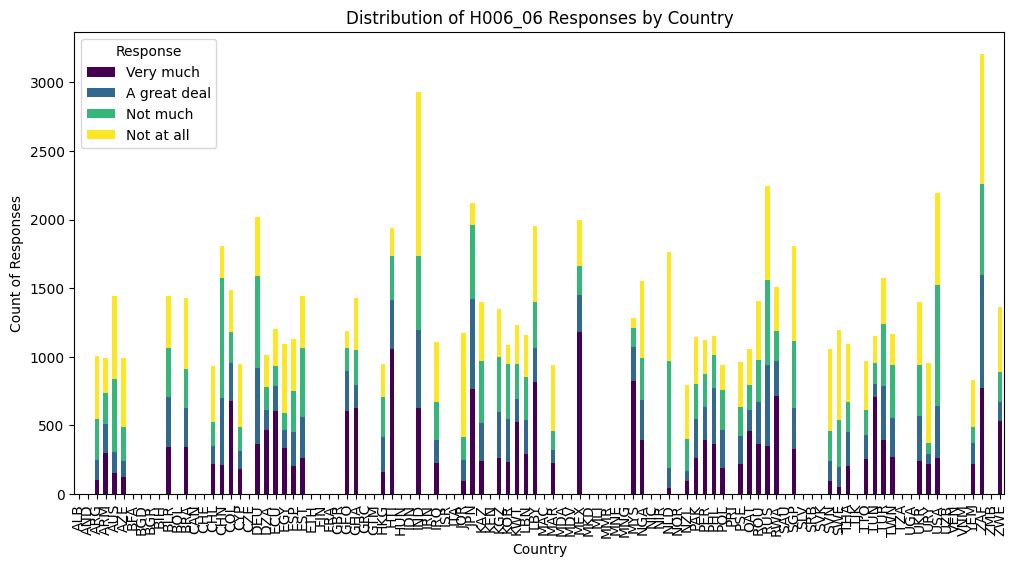

In [18]:
# Select only valid responses for a cleaner plot
valid_responses = ["Very much", "A great deal", "Not much", "Not at all"]
h006_06_by_country = h006_06_by_country[valid_responses]

# Plot a stacked bar chart
h006_06_by_country.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")

plt.title("Distribution of H006_06 Responses by Country")
plt.xlabel("Country")
plt.ylabel("Count of Responses")
plt.legend(title="Response")
plt.xticks(rotation=90)
plt.show()

In [19]:
# List of all countries in the dataset
all_countries = set(df_wvs["COUNTRY_ALPHA"].unique())

# List of countries that have at least one valid response
valid_responses = ["Very much", "A great deal", "Not much", "Not at all"]
countries_with_responses = set(df_wvs[df_wvs["H006_06"].isin(valid_responses)]["COUNTRY_ALPHA"].unique())

# Find countries that have NO responses
countries_without_responses = all_countries - countries_with_responses

# Display the list
print("Countries with NO responses for H006_06:")
print(sorted(countries_without_responses))

Countries with NO responses for H006_06:
['ALB', 'AND', 'BFA', 'BGD', 'BGR', 'BIH', 'BOL', 'CAN', 'CHE', 'CZE', 'ETH', 'FIN', 'FRA', 'GBR', 'GRC', 'GTM', 'HUN', 'IDN', 'IRN', 'ISR', 'ITA', 'KEN', 'MAC', 'MDA', 'MDV', 'MKD', 'MLI', 'MMR', 'MNE', 'MNG', 'NIC', 'NIR', 'NOR', 'PRI', 'SAU', 'SLV', 'SRB', 'SVK', 'TJK', 'TZA', 'UGA', 'UZB', 'VEN', 'VNM', 'ZMB']


In [20]:
# List of all countries in the dataset
all_countries = set(df_wvs["COUNTRY_ALPHA"].unique())

# List of countries that have at least one valid response
valid_responses = ["Very much", "A great deal", "Not much", "Not at all"]
countries_with_responses = set(df_wvs[df_wvs["H006_06"].isin(valid_responses)]["COUNTRY_ALPHA"].unique())

# Display the list
print("Countries with responses for H006_06:")
print(sorted(countries_with_responses))

Countries with responses for H006_06:
['ARG', 'ARM', 'AUS', 'AZE', 'BLR', 'BRA', 'CHL', 'CHN', 'COL', 'CYP', 'DEU', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'GEO', 'GHA', 'HKG', 'HTI', 'IND', 'IRQ', 'JOR', 'JPN', 'KAZ', 'KGZ', 'KOR', 'KWT', 'LBN', 'LBY', 'MAR', 'MEX', 'MYS', 'NGA', 'NLD', 'NZL', 'PAK', 'PER', 'PHL', 'POL', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SGP', 'SVN', 'SWE', 'THA', 'TTO', 'TUN', 'TUR', 'TWN', 'UKR', 'URY', 'USA', 'YEM', 'ZAF', 'ZWE']


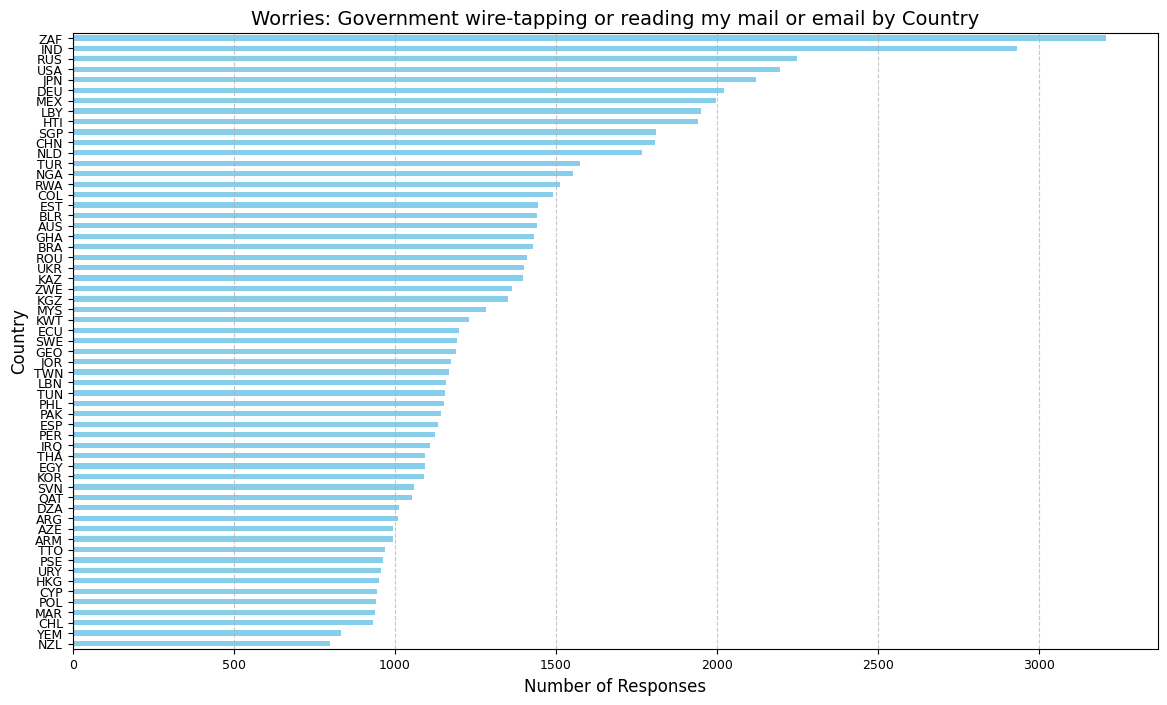

In [21]:
import matplotlib.pyplot as plt

# Filter for valid responses
valid_responses = ["Very much", "A great deal", "Not much", "Not at all"]
df_valid_h006_06 = df_wvs[df_wvs["H006_06"].isin(valid_responses)]

# Count responses per country
responses_per_country = df_valid_h006_06["COUNTRY_ALPHA"].value_counts()

# Plot
plt.figure(figsize=(14, 8))  # Adjust figure size
responses_per_country.sort_values().plot(kind="barh", color="skyblue")

# Improve readability
plt.title("Worries: Government wire-tapping or reading my mail or email by Country", fontsize=14)
plt.xlabel("Number of Responses", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)  # Adjust country label size
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

In [35]:
import pandas as pd

# Define response categories
worry_responses = ["Very much", "A great deal"]
dont_worry_responses = ["Not much", "Not at all"]

# Create a new column categorizing responses
df_wvs["H006_06_rescaled"] = df_wvs["H006_06"].map(lambda x: "Worry" if x in worry_responses else ("Don't worry" if x in dont_worry_responses else None))

# Drop missing values
df_valid = df_wvs.dropna(subset=["H006_06_rescaled"])

# Count responses per country and normalize
country_worry_counts = df_valid.groupby("COUNTRY_ALPHA")["H006_06_rescaled"].value_counts(normalize=True).unstack()

# Sort countries by highest proportion of "Worry"
country_worry_counts = country_worry_counts.sort_values(by="Worry", ascending=False)

# Display the list
print("Rank Countries That Worry the Most:")
print(country_worry_counts["Worry"])

/var/folders/vk/c6csf7ws6pj9wy406twfjkfw0000gn/T/ipykernel_28178/538415953.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wvs["H006_06_rescaled"] = df_wvs["H006_06"].map(lambda x: "Worry" if x in worry_responses else ("Don't worry" if x in dont_worry_responses else None))


Rank Countries That Worry the Most:
COUNTRY_ALPHA
MYS    0.839188
GEO    0.752525
HTI    0.727975
MEX    0.726817
TUN    0.698440
JPN    0.672170
PHL    0.670139
ECU    0.657500
RWA    0.641297
COL    0.639839
DZA    0.604146
QAT    0.578748
KWT    0.565854
PER    0.563669
GHA    0.555168
LBY    0.544336
ARM    0.514602
KOR    0.502752
TUR    0.499682
POL    0.498938
ZAF    0.498285
ZWE    0.493392
BLR    0.492372
PAK    0.478109
ROU    0.478014
TWN    0.476027
LBN    0.466782
DEU    0.455220
YEM    0.446450
NGA    0.443299
TTO    0.442724
PSE    0.440748
KGZ    0.440741
BRA    0.439468
HKG    0.438947
EGY    0.426874
RUS    0.418336
THA    0.415905
IND    0.408874
UKR    0.405289
ESP    0.402116
EST    0.387387
CHN    0.386615
CHL    0.378349
KAZ    0.370079
IRQ    0.352888
SGP    0.346961
MAR    0.343983
CYP    0.329101
URY    0.307933
USA    0.293394
ARG    0.250000
AZE    0.242699
SVN    0.225898
AUS    0.212205
JOR    0.211064
NZL    0.207026
SWE    0.162615
NLD    0.108720
Name: 

/var/folders/vk/c6csf7ws6pj9wy406twfjkfw0000gn/T/ipykernel_28178/4107400291.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wvs["H006_06_rescaled"] = df_wvs["H006_06"].map(lambda x: "Worry" if x in worry_responses else ("Don't worry" if x in dont_worry_responses else None))


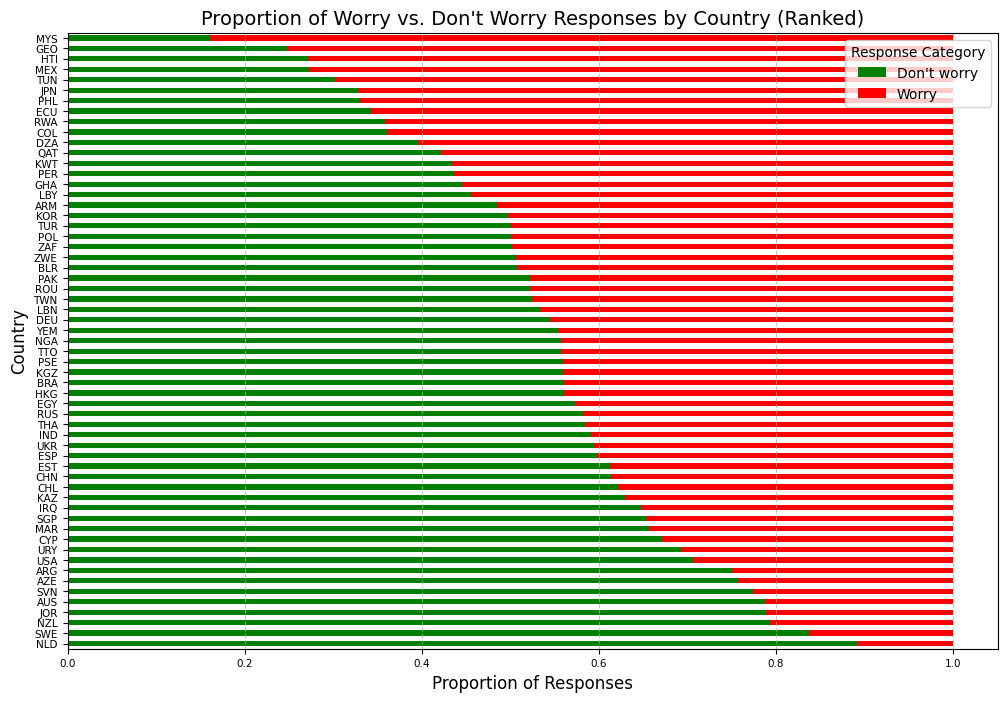

In [36]:
#### Ranking worries that government intervenes personal communiaction channels by country

import pandas as pd
import matplotlib.pyplot as plt

# Define response categories
worry_responses = ["Very much", "A great deal"]
dont_worry_responses = ["Not much", "Not at all"]

# Create a new column categorizing responses
df_wvs["H006_06_rescaled"] = df_wvs["H006_06"].map(lambda x: "Worry" if x in worry_responses else ("Don't worry" if x in dont_worry_responses else None))

# Drop missing values
df_valid = df_wvs.dropna(subset=["H006_06_rescaled"])

# Count responses per country and normalize
country_worry_counts = df_valid.groupby("COUNTRY_ALPHA")["H006_06_rescaled"].value_counts(normalize=True).unstack()

# Sort countries by highest proportion of "Worry"
country_worry_counts = country_worry_counts.sort_values(by="Worry", ascending=True)

# Plot the ranked proportions
country_worry_counts.plot(kind="barh", stacked=True, figsize=(12, 8), color=["green", "red"])  # Red for Worry, Green for Don't Worry

plt.title("Proportion of Worry vs. Don't Worry Responses by Country (Ranked)", fontsize=14)
plt.xlabel("Proportion of Responses", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(fontsize=7.5)
plt.yticks(fontsize=7.5)  # Adjust country label size
plt.legend(title="Response Category")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

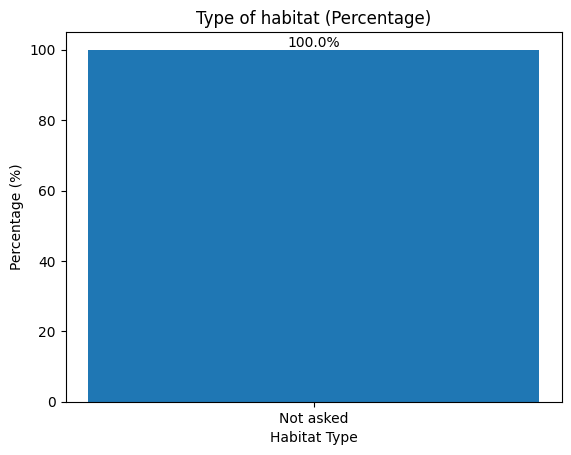

In [37]:
# Define value mappings
value_labels = {
    1: "Rural area-village",
    2: "Small-medium town",
    3: "Large town",
    -1: "Don't know",
    -2: "No answer",
    -4: "Not asked",
    -5: "Missing"
}

# Replace values only for plotting
counts = df_wvs["X050"].replace(value_labels).value_counts(normalize=True) * 100

# Histogram (incl. percentages)
plt.bar(counts.index, counts.values)  
plt.title("Type of habitat (Percentage)")
plt.xlabel("Habitat Type")
plt.ylabel("Percentage (%)")

# Show percentages on top of bars
for index, value in enumerate(counts.values):
    plt.text(counts.index[index], value, f'{value:.1f}%', ha='center', va='bottom')

plt.show()

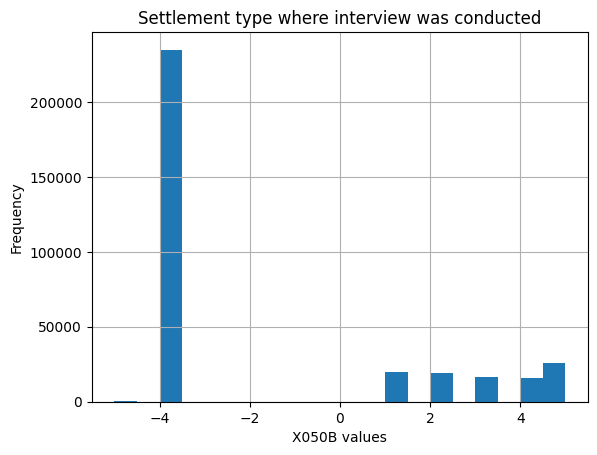

In [38]:
df_wvs["X050B"].hist(bins=20)
plt.title("Settlement type where interview was conducted")
plt.xlabel("X050B values")
plt.ylabel("Frequency")
plt.show()

## Welzel Skepticism Sub-Index - (Or skepticism of the justice system)
**Meaning:** 3-item index measuring a national culture’s distance to “sacred” sources of authority in the domain of order institutions (army, police, courts).  

- A lower score (closer to 0) means that people have a strong respect for and adherence to the authority of institutions like the army, police, and courts. In other words, the society is more traditional and respects these sources of authority.
- A higher score (closer to 1.0) indicates that people reject or question the authority of these institutions, showing a more secular or modern attitude towards them. This suggests that these institutions hold less influence or power over society. 

**Scaling:** Multi-point scale, ranging from a theoretical minimum of 0 when the least secular position is taken on all 3 items, to a maximum of 1.0 when the most secular position is taken on all 3 items. Intermediate positions are given in fractions of 1.0. Country scores are population averages (arithmetic mean) on the 0-1 index.

**Source:** Index invented and documented in Welzel, Freedom Rising (2013: 63-66), www.cambridge.org/welzel (Online Appendix, p. 12-19), based on data from the World Values Surveys, all countries and time points.  

In [39]:
yearly_stats = df_wvs.groupby("S020")["Y014"].describe()
print(yearly_stats)

        count      mean       std   min       25%       50%       75%    max
S020                                                                        
1999   4620.0  0.490906  0.249630  0.00  0.346440  0.476790  0.660000  1.000
2000  10072.0  0.485972  0.233129  0.06  0.346440  0.476790  0.632880  0.928
2001  29827.0  0.395014  0.227913  0.06  0.216090  0.346440  0.533000  0.928
2002   4483.0  0.441480  0.231109  0.06  0.346440  0.372180  0.632880  0.928
2003   1032.0  0.576911  0.207619  0.06  0.476790  0.632880  0.663350  0.928
2004   1895.0  0.513301  0.215204  0.00  0.330000  0.502530  0.660000  1.000
2005  17032.0  0.464260  0.217797  0.00  0.330000  0.440000  0.650100  1.000
2006  33023.0  0.467474  0.250586  0.00  0.330000  0.440000  0.660000  1.000
2007  21906.0  0.391882  0.249087  0.00  0.220000  0.346440  0.550000  1.000
2008      0.0       NaN       NaN   NaN       NaN       NaN       NaN    NaN
2009   2397.0  0.528317  0.218024  0.00  0.330000  0.550000  0.660000  1.000

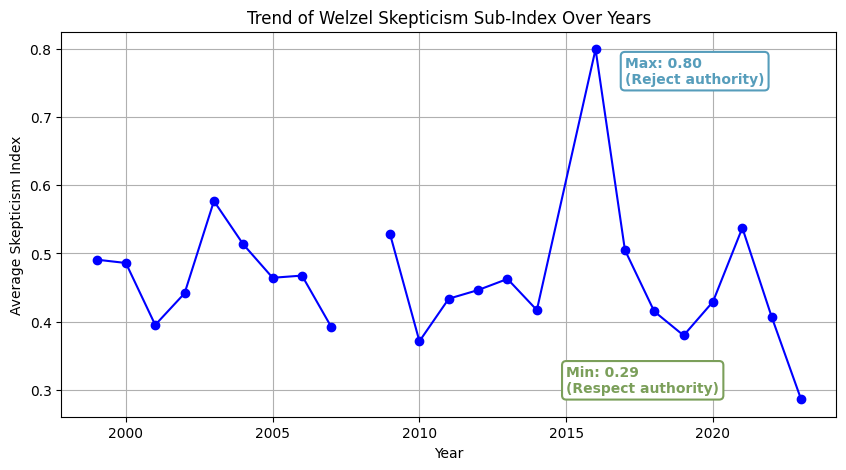

In [40]:
# Mean Skepticism Index per year
yearly_avg = df_wvs.groupby("S020")["Y014"].mean()

# Identify the years with the highest and lowest values
max_year = yearly_avg.idxmax()  # Year with the highest value
min_year = yearly_avg.idxmin()  # Year with the lowest value

max_value = yearly_avg.max()  # Highest value of the Skepticism Index
min_value = yearly_avg.min()  # Lowest value of the Skepticism Index

# Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Average Skepticism Index")
plt.title("Trend of Welzel Skepticism Sub-Index Over Years")
plt.grid(True)

# Add labels with styled text boxes for the highest and lowest points
plt.annotate(f"Max: {max_value:.2f}\n(Reject authority)", 
             xy=(max_year, max_value), 
             xytext=(max_year + 1, max_value - 0.05),  # Adjust text position
             bbox=dict(facecolor='white', edgecolor='#569dbb', boxstyle="round,pad=0.3", lw=1.5),
             fontsize=10, color='#569dbb', fontweight='bold')

plt.annotate(f"Min: {min_value:.2f}\n(Respect authority)", 
             xy=(min_year, min_value), 
             xytext=(min_year -8, min_value + 0.01),  # Adjust text position
             bbox=dict(facecolor='white', edgecolor='#7b9f5a', boxstyle="round,pad=0.3", lw=1.5),
             fontsize=10, color='#7b9f5a', fontweight='bold')

plt.show()

## Wezel Defiance Sub-Index - Or defiance of authority figures
**Meaning:** 3-item index measuring a national culture’s distance to “sacred” sources of authority in the domain of patrimonial authority (the nation, the state, the parents).  

- A lower score (closer to 0) means people tend to strongly respect and follow these traditional authorities.
- A higher score (closer to 1.0) means people tend to question, challenge, or reject these authorities in favor of more secular or independent perspectives.

**Scaling:** Multi-point scale, ranging from a theoretical minimum of 0 when the least secular position is taken on all 3 items, to a maximum of 1.0 when the most secular position is taken on all 3 items. Intermediate positions are given in fractions of 1.0. Country scores are population averages (arithmetic mean) on the 0-1 index.

**Source:** Index invented and documented in Welzel, Freedom Rising (2013: 63-66), www.cambridge.org/welzel (Online Appendix, p. 12-19), based on data from the World Values Surveys, all countries and time points.  

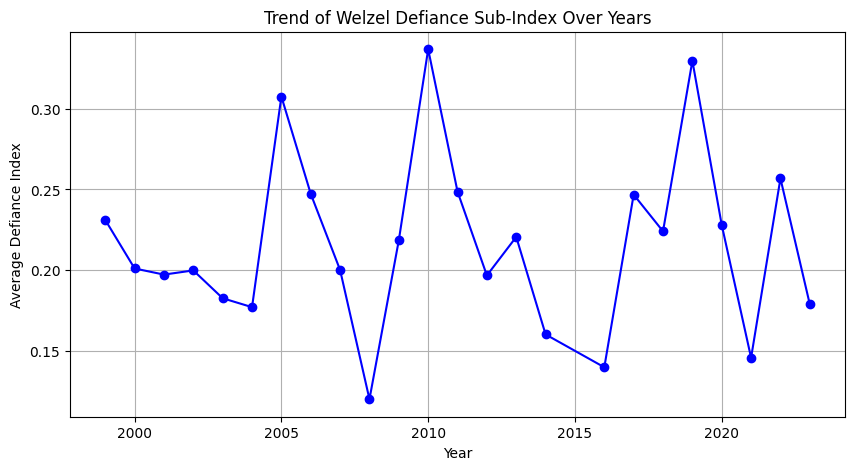

In [41]:
# Mean of Defiance Index per year
yearly_avg = df_wvs.groupby("S020")["Y011"].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Average Defiance Index")
plt.title("Trend of Welzel Defiance Sub-Index Over Years")
plt.grid(True)

plt.show()

In [42]:
# Group by year and calculate the average for each sub-index
avg_defiance_by_year = df_wvs.groupby("S020")["Y011"].mean()
avg_skepticism_by_year = df_wvs.groupby("S020")["Y014"].mean()

# Year with the highest and lowest average for Defiance (Y011)
max_defiance_year = avg_defiance_by_year.idxmax()
min_defiance_year = avg_defiance_by_year.idxmin()

# Year with the highest and lowest average for Skepticism (Y014)
max_skepticism_year = avg_skepticism_by_year.idxmax()
min_skepticism_year = avg_skepticism_by_year.idxmin()

# Output the results
print(f"Year with highest defiance (Y011): {max_defiance_year}")
print(f"Year with lowest defiance (Y011): {min_defiance_year}")
print(f"Year with highest skepticism (Y014): {max_skepticism_year}")
print(f"Year with lowest skepticism (Y014): {min_skepticism_year}")

Year with highest defiance (Y011): 2010
Year with lowest defiance (Y011): 2008
Year with highest skepticism (Y014): 2016
Year with lowest skepticism (Y014): 2023


In [43]:
# Group by country and average for each sub-index
avg_defiance_by_country = df_wvs.groupby("COUNTRY_ALPHA")["Y011"].mean()
avg_skepticism_by_country = df_wvs.groupby("COUNTRY_ALPHA")["Y014"].mean()

# Top 10 countries with the highest and lowest average for Defiance (Y011)
top_10_defiance_high = avg_defiance_by_country.nlargest(10)
top_10_defiance_low = avg_defiance_by_country.nsmallest(10)

# Get the top 10 countries with the highest and lowest average for Skepticism (Y014)
top_10_skepticism_high = avg_skepticism_by_country.nlargest(10)
top_10_skepticism_low = avg_skepticism_by_country.nsmallest(10)

# Output the results
print("Top 10 countries with the highest defiance (Y011):")
print(top_10_defiance_high)

print("\nTop 10 countries with the lowest defiance (Y011):")
print(top_10_defiance_low)

print("\nTop 10 countries with the highest skepticism (Y014):")
print(top_10_skepticism_high)

print("\nTop 10 countries with the lowest skepticism (Y014):")
print(top_10_skepticism_low)

Top 10 countries with the highest defiance (Y011):
COUNTRY_ALPHA
JPN    0.567801
SWE    0.463254
TWN    0.445704
HKG    0.437364
NOR    0.431002
MAC    0.427560
KOR    0.426767
CHE    0.401988
FIN    0.398795
EST    0.395044
Name: Y011, dtype: float64

Top 10 countries with the lowest defiance (Y011):
COUNTRY_ALPHA
QAT    0.013440
GHA    0.054183
UZB    0.073355
ECU    0.076818
LBY    0.077880
JOR    0.079227
PRI    0.079840
YEM    0.090099
TTO    0.094672
BGD    0.095527
Name: Y011, dtype: float64

Top 10 countries with the highest skepticism (Y014):
COUNTRY_ALPHA
HTI    0.799867
BOL    0.684665
PER    0.675735
NIC    0.668142
ARG    0.661035
GTM    0.649895
VEN    0.617579
YEM    0.613404
MDA    0.584597
MEX    0.581776
Name: Y014, dtype: float64

Top 10 countries with the lowest skepticism (Y014):
COUNTRY_ALPHA
QAT    0.111048
JOR    0.181463
VNM    0.190658
UZB    0.191661
TJK    0.255875
FIN    0.285948
CHN    0.287532
TZA    0.287780
TUR    0.304454
KWT    0.305726
Name: Y014, dt

## Variables of interest

In [44]:
import pandas as pd
import numpy as np

# Function to normalize (multi-point scale 0 to 1)
def multi_scale(value):
    if value == 1:
        return 1.0  # Very important
    elif value == 2:
        return 0.67  # Rather important
    elif value == 3:
        return 0.33  # Not very important
    elif value == 4:
        return 0.0  # Not at all important
    else:
        return np.nan  # Invalid or missing values

# Apply the normalization to both A001 and A002
df_wvs['norm_A001'] = df_wvs['A001'].apply(multi_scale)
df_wvs['norm_A002'] = df_wvs['A002'].apply(multi_scale)

# Create the "importance_close_circle" by averaging the normalized values of A001 and A002
df_wvs['importance_close_circle'] = df_wvs[['norm_A001', 'norm_A002']].mean(axis=1)

# Inspect the first few rows of the new indicator
print(df_wvs[['A001', 'A002', 'importance_close_circle']].head(100))

      A001  A002  importance_close_circle
999      1     1                    1.000
1000     1     2                    0.835
1001     1     2                    0.835
1002     1     3                    0.665
1003     1     2                    0.835
...    ...   ...                      ...
1094     1     3                    0.665
1095     1     1                    1.000
1096     1     1                    1.000
1097     1     2                    0.835
1098     1     2                    0.835

[100 rows x 3 columns]


/var/folders/vk/c6csf7ws6pj9wy406twfjkfw0000gn/T/ipykernel_28178/1181796519.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wvs['norm_A001'] = df_wvs['A001'].apply(multi_scale)
/var/folders/vk/c6csf7ws6pj9wy406twfjkfw0000gn/T/ipykernel_28178/1181796519.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wvs['norm_A002'] = df_wvs['A002'].apply(multi_scale)
/var/folders/vk/c6csf7ws6pj9wy406twfjkfw0000gn/T/ipykernel_28178/1181796519.py:22: SettingWithCopyWarning: 
A value is trying to be set on a c

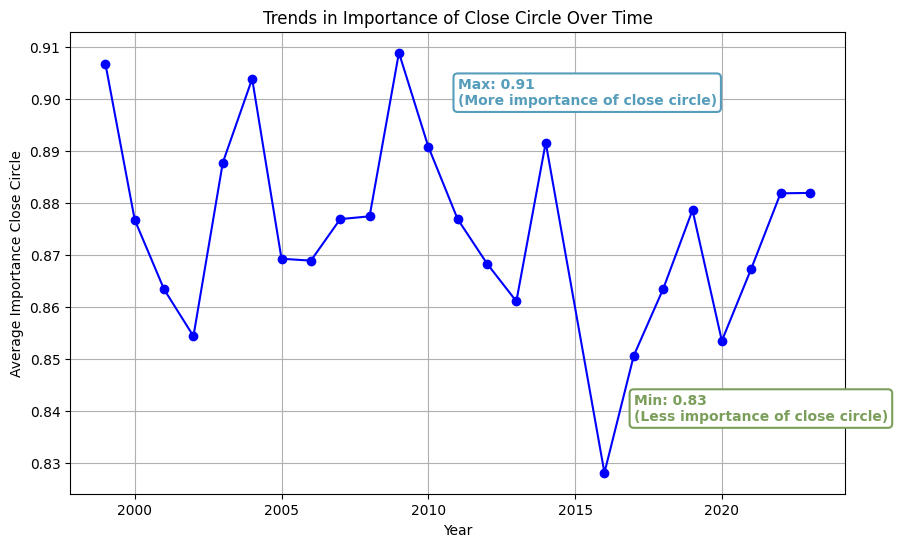

In [45]:
# Group by year and calculate the mean of importance_close_circle
yearly_trends = df_wvs.groupby('S020')['importance_close_circle'].mean()

# Identify the years with the highest and lowest values
max_year = yearly_trends.idxmax()  # Year with the highest value
min_year = yearly_trends.idxmin()  # Year with the lowest value

max_value = yearly_trends.max()  # Highest value of the Importance Close Circle
min_value = yearly_trends.min()  # Lowest value of the Importance Close Circle

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_trends.index, yearly_trends.values, marker='o', linestyle='-', color='b')
plt.title("Trends in Importance of Close Circle Over Time")
plt.xlabel("Year")
plt.ylabel("Average Importance Close Circle")
plt.grid(True)

# Add labels with styled text boxes for the highest and lowest points
plt.annotate(f"Max: {max_value:.2f}\n(More importance of close circle)", 
             xy=(max_year, max_value), 
             xytext=(max_year + 2, max_value -0.01),  # Adjust text position
             bbox=dict(facecolor='white', edgecolor='#569dbb', boxstyle="round,pad=0.3", lw=1.5),
             fontsize=10, color='#569dbb', fontweight='bold')

plt.annotate(f"Min: {min_value:.2f}\n(Less importance of close circle)", 
             xy=(min_year, min_value), 
             xytext=(min_year + 1, min_value + 0.01),  # Adjust text position
             bbox=dict(facecolor='white', edgecolor='#7b9f5a', boxstyle="round,pad=0.3", lw=1.5),
             fontsize=10, color='#7b9f5a', fontweight='bold')

plt.show()

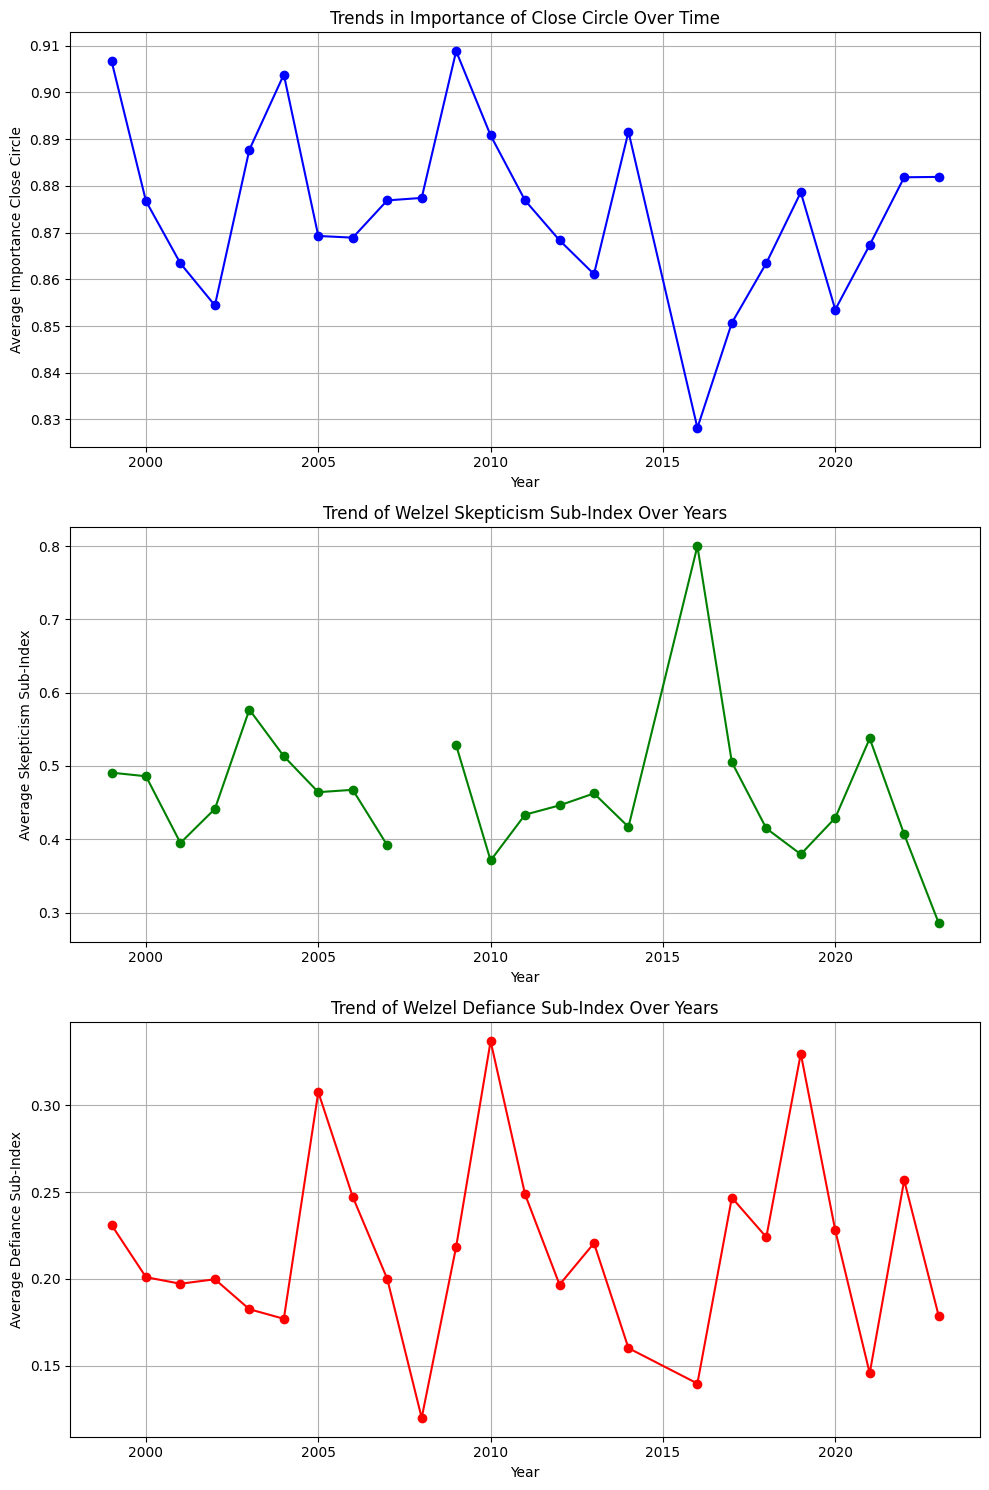

In [46]:
import matplotlib.pyplot as plt

# Group by year and calculate the mean of importance_close_circle, Y014 (Skepticism), and Y011 (Defiance)
importance_trends = df_wvs.groupby('S020')['importance_close_circle'].mean()
skepticism_trends = df_wvs.groupby('S020')['Y014'].mean()  # Skepticism Sub-Index
defiance_trends = df_wvs.groupby('S020')['Y011'].mean()  # Defiance Sub-Index

# Create the figure and axes for the subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plot the Importance of Close Circle
ax[0].plot(importance_trends.index, importance_trends.values, marker='o', linestyle='-', color='b')
ax[0].set_title("Trends in Importance of Close Circle Over Time")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Average Importance Close Circle")
ax[0].grid(True)

# Plot the Trend of Welzel Skepticism Sub-Index
ax[1].plot(skepticism_trends.index, skepticism_trends.values, marker='o', linestyle='-', color='g')
ax[1].set_title("Trend of Welzel Skepticism Sub-Index Over Years")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Average Skepticism Sub-Index")
ax[1].grid(True)

# Plot the Trend of Welzel Defiance Sub-Index
ax[2].plot(defiance_trends.index, defiance_trends.values, marker='o', linestyle='-', color='r')
ax[2].set_title("Trend of Welzel Defiance Sub-Index Over Years")
ax[2].set_xlabel("Year")
ax[2].set_ylabel("Average Defiance Sub-Index")
ax[2].grid(True)

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

## Correlations

Pearson Correlation between Importance Close Circle and Skepticism: -0.32


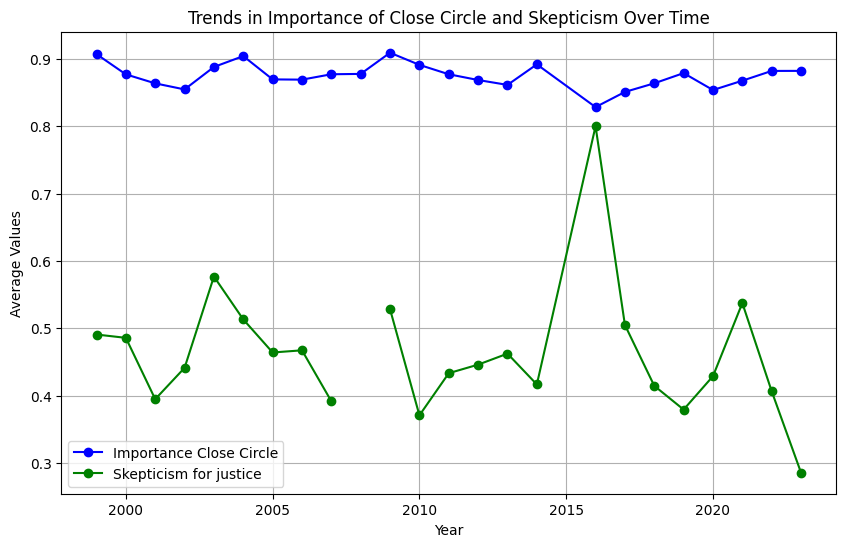

In [47]:
# Group by year and calculate the mean of Importance Close Circle and Skepticism
importance_trends = df_wvs.groupby('S020')['importance_close_circle'].mean()
yearly_avg_skepticism = df_wvs.groupby("S020")["Y014"].mean()  # Mean Skepticism Index per year

# Calculate the Pearson correlation between Importance Close Circle and Skepticism
correlation = importance_trends.corr(yearly_avg_skepticism)

# Print the correlation value
print(f"Pearson Correlation between Importance Close Circle and Skepticism: {correlation:.2f}")

# Plot the two trends to visually inspect the relationship
plt.figure(figsize=(10, 6))
plt.plot(importance_trends.index, importance_trends.values, label='Importance Close Circle', color='b', marker='o')
plt.plot(yearly_avg_skepticism.index, yearly_avg_skepticism.values, label='Skepticism for justice', color='g', marker='o')

# Add labels, title, and legend
plt.title("Trends in Importance of Close Circle and Skepticism Over Time")
plt.xlabel("Year")
plt.ylabel("Average Values")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Pearson Correlation between Importance Close Circle and Defiance: 0.13


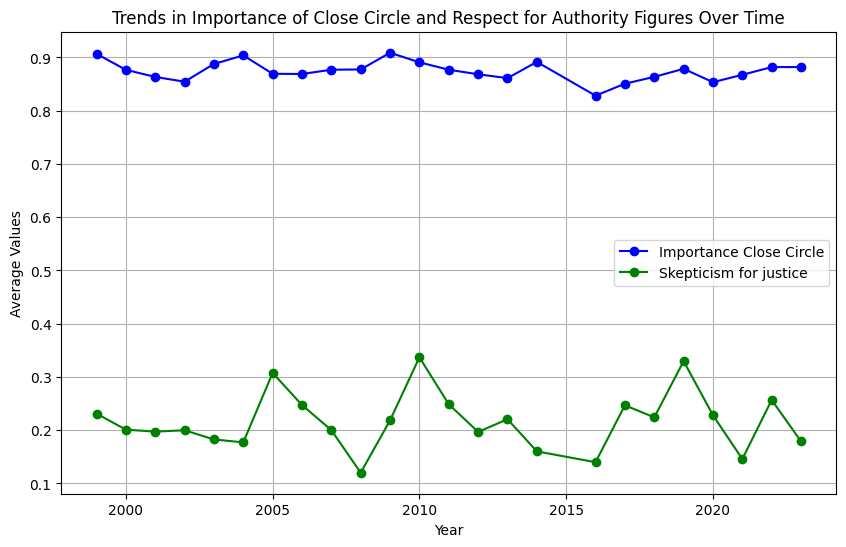

In [48]:
# Group by year and calculate the mean of Importance Close Circle and Skepticism
importance_trends = df_wvs.groupby('S020')['importance_close_circle'].mean()
authority_respect = df_wvs.groupby("S020")["Y011"].mean()  # Mean Skepticism Index per year

# Calculate the Pearson correlation between Importance Close Circle and Respect for authority
correlation = importance_trends.corr(authority_respect)

# Print the correlation value
print(f"Pearson Correlation between Importance Close Circle and Defiance: {correlation:.2f}")

# Plot the two trends to visually inspect the relationship
plt.figure(figsize=(10, 6))
plt.plot(importance_trends.index, importance_trends.values, label='Importance Close Circle', color='b', marker='o')
plt.plot(authority_respect.index, authority_respect.values, label='Skepticism for justice', color='g', marker='o')

# Add labels, title, and legend
plt.title("Trends in Importance of Close Circle and Respect for Authority Figures Over Time")
plt.xlabel("Year")
plt.ylabel("Average Values")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()